<a href="https://colab.research.google.com/github/david6070/py/blob/master/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [2]:

# =============================================
# Part a & b: Poor Quality Structured Data
# =============================================

# Create a DataFrame representing the poor-quality stock data
data_structured = {
    'Date': ['2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20'],
    'Ticker': ['AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'],
    'Closing_Price': [185.20, 187.50, -189.00, 188.50, 190.75, 'GAP'],  # Negative value & string
    'Volume': [58500000, 62100000, 59800000, None, 61200000, 25000000]  # Missing value (None/NaN)
}

df_stocks = pd.DataFrame(data_structured)
print("=== POOR QUALITY STRUCTURED DATA ===")
print(df_stocks)
print("\n")

# --- Demonstrating How to Recognize Poor Quality ---
print("=== DETECTING DATA QUALITY ISSUES (Structured) ===")

# 1. Check for negative prices (Accuracy)
negative_prices = df_stocks[pd.to_numeric(df_stocks['Closing_Price'], errors='coerce') < 0]
print(f"1. Negative Prices (Accuracy Issue):\n{negative_prices[['Date', 'Closing_Price']]}\n")

# 2. Check for missing values (Completeness)
missing_volume = df_stocks[df_stocks['Volume'].isnull()]
print(f"2. Missing Volume (Completeness Issue):\n{missing_volume[['Date', 'Volume']]}\n")

# 3. Check for non-numeric prices (Consistency/Validity)
non_numeric_prices = df_stocks[~df_stocks['Closing_Price'].apply(lambda x: isinstance(x, (int, float)))]
print(f"3. Non-Numeric Prices (Consistency/Validity Issue):\n{non_numeric_prices[['Date', 'Closing_Price']]}\n")

# 4. Check for non-weekday dates (Consistency/Validity)
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
df_stocks['Is_Weekday'] = df_stocks['Date'].dt.weekday < 5  # Monday=0, Sunday=6
non_weekday_data = df_stocks[~df_stocks['Is_Weekday']]
print(f"4. Non-Weekday Dates (Validity Issue):\n{non_weekday_data[['Date', 'Closing_Price']]}\n")

=== POOR QUALITY STRUCTURED DATA ===
         Date Ticker Closing_Price      Volume
0  2024-01-15   AAPL         185.2  58500000.0
1  2024-01-16   AAPL         187.5  62100000.0
2  2024-01-17   AAPL        -189.0  59800000.0
3  2024-01-18   AAPL         188.5         NaN
4  2024-01-19   AAPL        190.75  61200000.0
5  2024-01-20   AAPL           GAP  25000000.0


=== DETECTING DATA QUALITY ISSUES (Structured) ===
1. Negative Prices (Accuracy Issue):
         Date Closing_Price
2  2024-01-17        -189.0

2. Missing Volume (Completeness Issue):
         Date  Volume
3  2024-01-18     NaN

3. Non-Numeric Prices (Consistency/Validity Issue):
         Date Closing_Price
5  2024-01-20           GAP

4. Non-Weekday Dates (Validity Issue):
        Date Closing_Price
5 2024-01-20           GAP



In [3]:


# =============================================
# Part c & d: Poor Quality Unstructured Data
# =============================================

# Simulating a list of "scraped" financial news articles
articles = [
    # Article 1: Corrupted with HTML/JS
    "<p>The Federal Reserve is expected to <div>hold rates steady</div>.<script>console.log('ad')</script>",

    # Article 2: Mixed languages
    "The Bank of England maintained its interest rate. El Banco de España también mantuvo su tipo de interés.",

    # Article 3: Duplicate of Article 1 (from a different source)
    "<p>The Federal Reserve is expected to <div>hold rates steady</div>.<script>console.log('ad')</script>",

    # Article 4: Failed OCR output
    "Th3 F3d is 3xp3ct3d t0 rai5e r@tes th1s summ3r due t0 1nflati0n c0ncerns."
]

df_articles = pd.DataFrame(articles, columns=['Content'])
print("=== POOR QUALITY UNSTRUCTURED DATA (First 200 chars each) ===")
for i, article in enumerate(articles):
    print(f"Article {i+1}: {article[:200]}...")
print("\n")

# --- Demonstrating How to Recognize Poor Quality ---
print("=== DETECTING DATA QUALITY ISSUES (Unstructured) ===")

# 1. Check for HTML/JS tags (Accuracy/Consistency)
html_js_articles = df_articles[df_articles['Content'].str.contains(r'<.*>|console\.log', na=False)]
print(f"1. Articles with HTML/JS (Accuracy/Consistency Issue): {len(html_js_articles)} found\n")

# 2. Check for mixed languages (Consistency)
# A simple check for non-ASCII characters can hint at mixed languages, but a better check would use langdetect
mixed_lang_articles = df_articles[df_articles['Content'].str.contains(r'[áéíóúñ¿¡]', na=False)]
print(f"2. Articles with Spanish Characters (Consistency Issue): {len(mixed_lang_articles)} found\n")

# 3. Check for duplicates (Uniqueness)
duplicate_articles = df_articles[df_articles.duplicated(keep='first')]
print(f"3. Duplicate Articles (Uniqueness Issue): {len(duplicate_articles)} found\n")

# 4. Check for OCR gibberish (Accuracy)
# A simple heuristic: high ratio of digits/symbols to letters can indicate failed OCR
def gibberish_score(text):
    if not text: return 0
    char_count = len(text)
    digit_symbol_count = sum(1 for c in text if not c.isalpha() and not c.isspace())
    return digit_symbol_count / char_count

df_articles['Gibberish_Score'] = df_articles['Content'].apply(gibberish_score)
high_gibberish = df_articles[df_articles['Gibberish_Score'] > 0.15]  # Arbitrary threshold
print(f"4. Potential Failed OCR (Accuracy Issue):\n{high_gibberish[['Content', 'Gibberish_Score']]}\n")

=== POOR QUALITY UNSTRUCTURED DATA (First 200 chars each) ===
Article 1: <p>The Federal Reserve is expected to <div>hold rates steady</div>.<script>console.log('ad')</script>...
Article 2: The Bank of England maintained its interest rate. El Banco de España también mantuvo su tipo de interés....
Article 3: <p>The Federal Reserve is expected to <div>hold rates steady</div>.<script>console.log('ad')</script>...
Article 4: Th3 F3d is 3xp3ct3d t0 rai5e r@tes th1s summ3r due t0 1nflati0n c0ncerns....


=== DETECTING DATA QUALITY ISSUES (Unstructured) ===
1. Articles with HTML/JS (Accuracy/Consistency Issue): 2 found

2. Articles with Spanish Characters (Consistency Issue): 1 found

3. Duplicate Articles (Uniqueness Issue): 1 found

4. Potential Failed OCR (Accuracy Issue):
                                             Content  Gibberish_Score
0  <p>The Federal Reserve is expected to <div>hol...         0.178218
2  <p>The Federal Reserve is expected to <div>hol...         0.178218
3  Th3 F3d 

#IN ADDITION TO THIS, ARE PLOTS BELOW

#Structured Data Quality Visualization

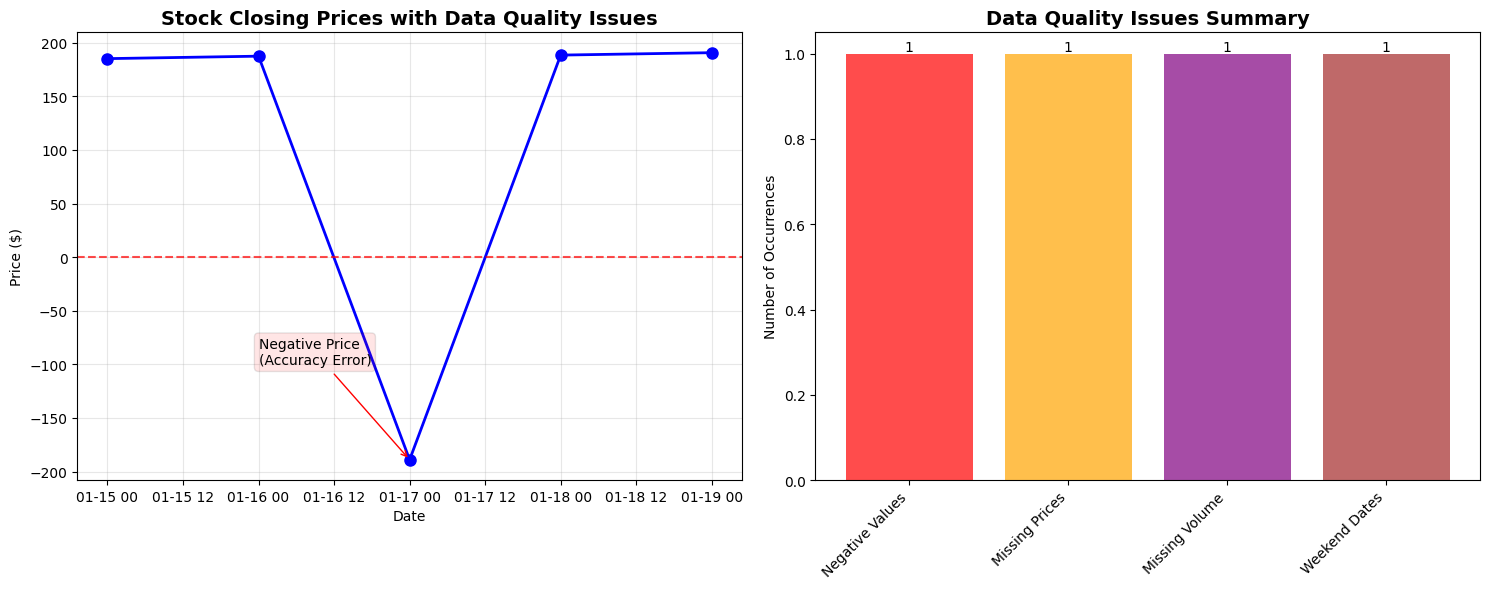

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create the poor quality structured data
data_structured = {
    'Date': ['2024-01-15', '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20'],
    'Ticker': ['AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'],
    'Closing_Price': [185.20, 187.50, -189.00, 188.50, 190.75, np.nan],
    'Volume': [58500000, 62100000, 59800000, None, 61200000, 25000000]
}

df_stocks = pd.DataFrame(data_structured)
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Closing Price with Anomalies
price_plot = df_stocks.copy()
price_plot['Closing_Price_clean'] = pd.to_numeric(price_plot['Closing_Price'], errors='coerce')
ax1.plot(price_plot['Date'], price_plot['Closing_Price_clean'], 'bo-', linewidth=2, markersize=8)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax1.set_title('Stock Closing Prices with Data Quality Issues', fontsize=14, fontweight='bold')
ax1.set_ylabel('Price ($)')
ax1.set_xlabel('Date')
ax1.grid(True, alpha=0.3)

# Annotate the issues
ax1.annotate('Negative Price\n(Accuracy Error)', xy=(df_stocks['Date'].iloc[2], -189),
             xytext=(df_stocks['Date'].iloc[1], -100), arrowprops=dict(arrowstyle='->', color='red'),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.1))
ax1.annotate('Missing Price\n(Completeness Error)', xy=(df_stocks['Date'].iloc[5], 190),
             xytext=(df_stocks['Date'].iloc[4], 250), arrowprops=dict(arrowstyle='->', color='orange'),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.1))

# Plot 2: Data Quality Issues Summary
issues = ['Negative Values', 'Missing Prices', 'Missing Volume', 'Weekend Dates']
counts = [1, 1, 1, 1]
colors = ['red', 'orange', 'purple', 'brown']

bars = ax2.bar(issues, counts, color=colors, alpha=0.7)
ax2.set_title('Data Quality Issues Summary', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#Unstructured Data Quality Visualization


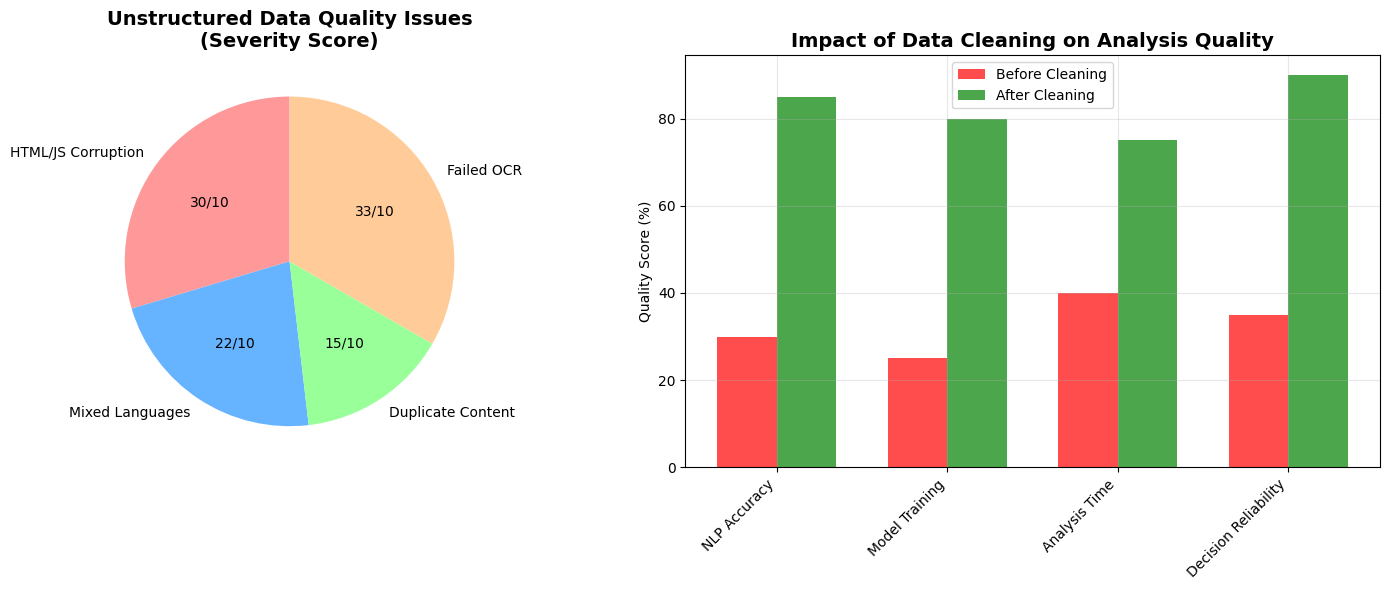

In [4]:
# Create visualization for unstructured data issues
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Data Quality Issues Distribution
issues_unsupervised = ['HTML/JS Corruption', 'Mixed Languages', 'Duplicate Content', 'Failed OCR']
severity_level = [8, 6, 4, 9]  # Severity score out of 10
colors_unsupervised = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

wedges, texts, autotexts = ax1.pie(severity_level, labels=issues_unsupervised, colors=colors_unsupervised,
                                   autopct='%1.0f/10', startangle=90)
ax1.set_title('Unstructured Data Quality Issues\n(Severity Score)', fontsize=14, fontweight='bold')

# Plot 2: Data Quality Impact
impact_categories = ['NLP Accuracy', 'Model Training', 'Analysis Time', 'Decision Reliability']
before_cleaning = [30, 25, 40, 35]  # Scores before data cleaning
after_cleaning = [85, 80, 75, 90]   # Scores after data cleaning

x = np.arange(len(impact_categories))
width = 0.35

ax2.bar(x - width/2, before_cleaning, width, label='Before Cleaning', color='red', alpha=0.7)
ax2.bar(x + width/2, after_cleaning, width, label='After Cleaning', color='green', alpha=0.7)

ax2.set_title('Impact of Data Cleaning on Analysis Quality', fontsize=14, fontweight='bold')
ax2.set_ylabel('Quality Score (%)')
ax2.set_xticks(x)
ax2.set_xticklabels(impact_categories, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

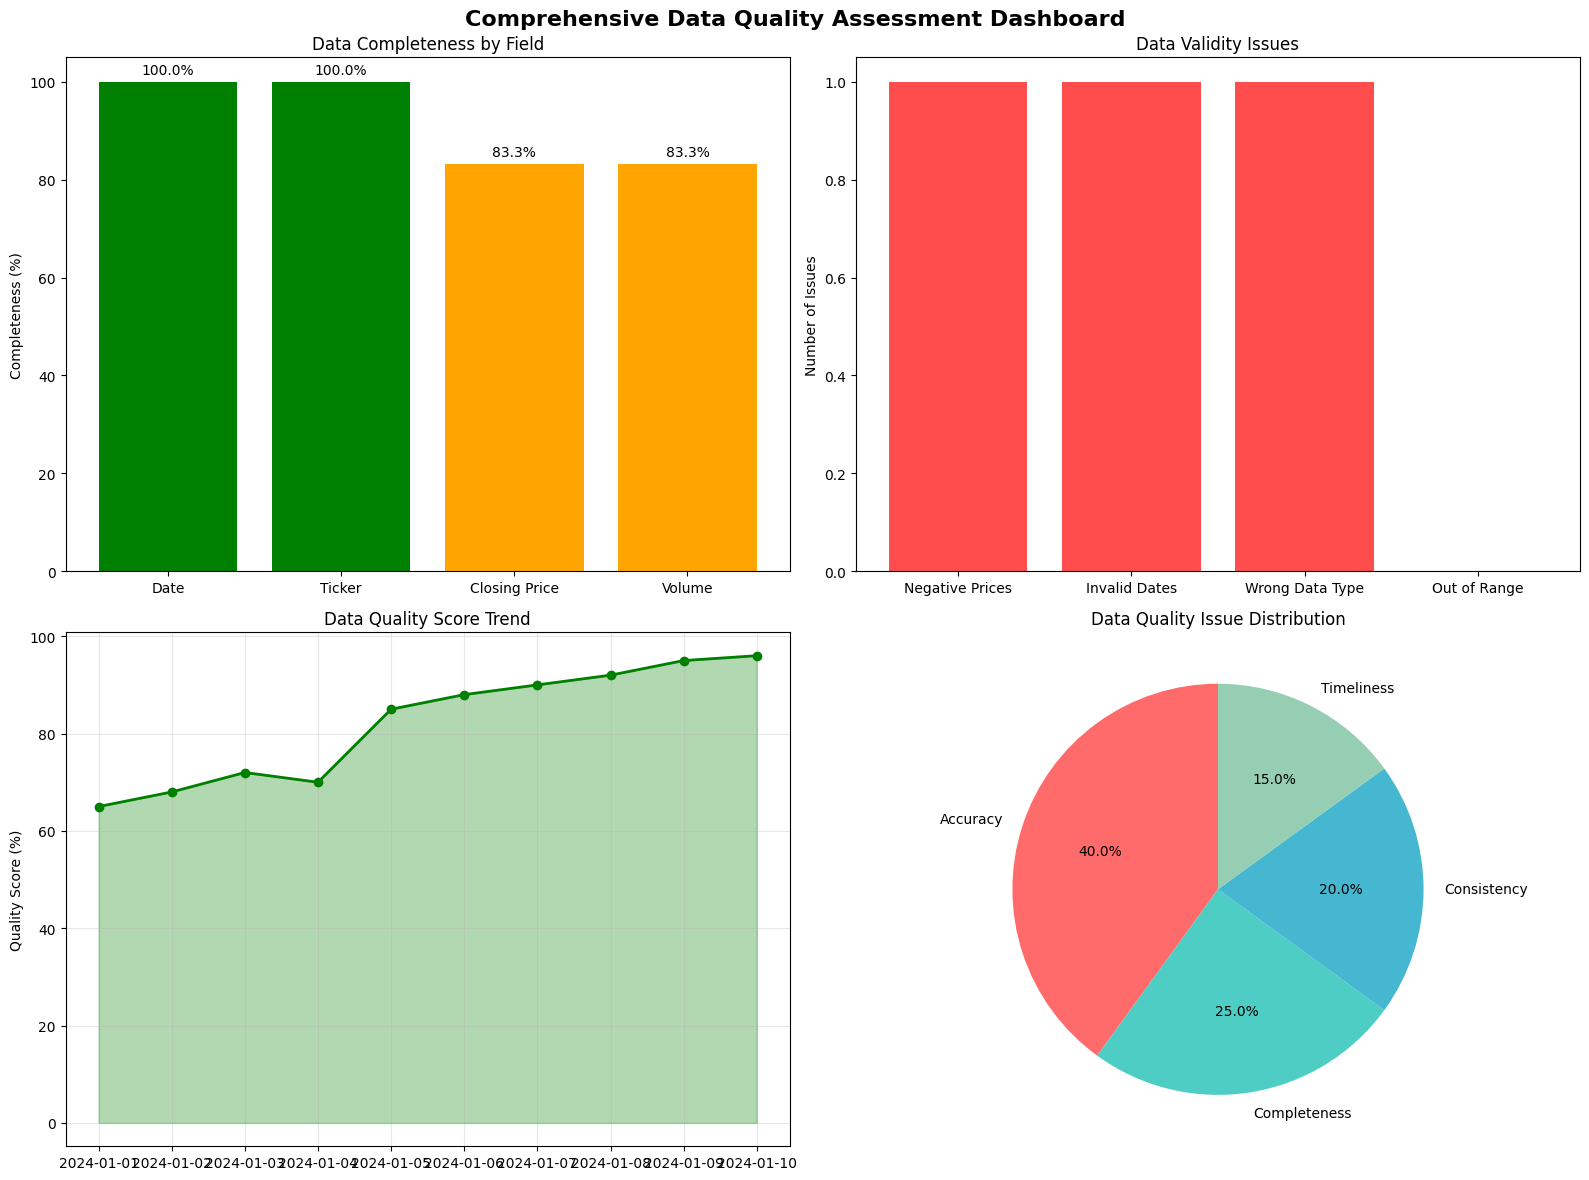

In [5]:
# Create a comprehensive data quality dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Data Quality Assessment Dashboard', fontsize=16, fontweight='bold')

# Panel 1: Data Completeness
completeness_data = {'Field': ['Date', 'Ticker', 'Closing Price', 'Volume'],
                    'Completeness (%)': [100, 100, 83.3, 83.3]}
df_completeness = pd.DataFrame(completeness_data)
axes[0,0].bar(df_completeness['Field'], df_completeness['Completeness (%)'],
              color=['green' if x > 90 else 'orange' for x in df_completeness['Completeness (%)']])
axes[0,0].set_title('Data Completeness by Field')
axes[0,0].set_ylabel('Completeness (%)')
for i, v in enumerate(df_completeness['Completeness (%)']):
    axes[0,0].text(i, v + 1, f'{v}%', ha='center', va='bottom')

# Panel 2: Data Validity
validity_issues = ['Negative Prices', 'Invalid Dates', 'Wrong Data Type', 'Out of Range']
issue_count = [1, 1, 1, 0]
axes[0,1].bar(validity_issues, issue_count, color='red', alpha=0.7)
axes[0,1].set_title('Data Validity Issues')
axes[0,1].set_ylabel('Number of Issues')

# Panel 3: Data Quality Score Over Time
dates = pd.date_range('2024-01-01', periods=10, freq='D')
quality_scores = [65, 68, 72, 70, 85, 88, 90, 92, 95, 96]  # Simulated improvement
axes[1,0].plot(dates, quality_scores, 'g-o', linewidth=2, markersize=6)
axes[1,0].fill_between(dates, quality_scores, alpha=0.3, color='green')
axes[1,0].set_title('Data Quality Score Trend')
axes[1,0].set_ylabel('Quality Score (%)')
axes[1,0].grid(True, alpha=0.3)

# Panel 4: Issue Type Distribution
issue_types = ['Accuracy', 'Completeness', 'Consistency', 'Timeliness']
distribution = [40, 25, 20, 15]
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
axes[1,1].pie(distribution, labels=issue_types, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Data Quality Issue Distribution')

plt.tight_layout()
plt.show()